# Линейная алгебра

## Векторы 

In [89]:
height_weight_age =[175, # сантиметры,
                    68,  # килограммы, 
                    40]  # годы
grades = [95, # экзамен1 
          80, # экзамен2
          75, # экзамен3
          62] # экзамен4

Сложение двух векторов

In [90]:
def vector_add(v,w):
    """данная функция складывает
    соответствующие элементы"""
    return[v_i+w_i for v_i,w_i in zip(v,w)]

In [91]:
vector_add([1,2],[2,1])

[3, 3]

Вычитание двух векторов

In [92]:
def vector_subtract(v,w):
    """данная функция вычитает
    соответствующие элементы"""
    return[v_i-w_i for v_i,w_i in zip(v,w)]

In [93]:
vector_subtract([1,2],[2,1])

[-1, 1]

Покомпонентная сумма списка векторов

In [94]:
def vector_sum(vectors):
    """Данная функция суммирует
    все соответствующие элементы"""
    result = vectors[0] #  начать с первого вектора
    for vector in vectors[1:]: # пройти в цикле по всем остальным векторам
        result = vector_add(result,vector) # и сложить их с результатом
    return result

In [95]:
vector_sum([[1,2,5],[5,2,1]])

[6, 4, 6]

более простые способы реализации покомпонентной суммы списка векторов

In [96]:
from functools import reduce # уже не поддерживается просто reduce
def vector_sum(vectors):
    """Данная функция суммирует
    все соответствующие элементы"""
    return reduce(vector_add,vectors)

In [97]:

vector_sum([[1,2,5],[5,2,1]])

[6, 4, 6]

или даже таким образом

In [98]:
from functools import reduce, partial
vector_sum = partial(reduce,vector_add) # лучше не использовать данный метод

In [99]:
vector_sum([[1,2,5],[5,2,1]])

[6, 4, 6]

Умножение вектора на скаляр

In [100]:
def scalar_multiply(c, v):
    """ Данная функция умнажает вектор 
    на число. c - это число,v-это вектор"""
    return[c*v_i for v_i in v]

In [101]:
scalar_multiply(3,[123,5,4,3])

[369, 15, 12, 9]

Покомпонентное среднее значение списка векторов (вектора одинакового размера)

In [102]:
def vector_mean(vectors):
    """Данная функция вычисляет вектор,
    чей i-ый элемент - это среднее значение 
    всех i-ых элементов входящих векторов"""
    n = len(vectors)
    return scalar_multiply(1/n,vector_sum(vectors))

In [103]:
vector_mean([[1,2,3],[4,5,6],[7,8,9]])

[4.0, 5.0, 6.0]

In [104]:
def dot(v,w):
    """ v_1*w_1+v_2*w_2+....+v_n*w_n """
    return sum(v_i*w_i for v_i,w_i in zip(v,w))

In [105]:
dot([1,2,3],[3,2,1])

10

Сумма квадратов вектора

In [106]:
def sum_of_squares(v):
    """v_1*v_1+...+v_n*v_n"""
    return dot(v,v)

In [107]:
sum_of_squares([3,2])

13

Величина длинны вектора

In [108]:
import math

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [109]:
magnitude([1,2,3])

3.7416573867739413

Вычисление Эвклидова расстояния

Квадрат расстояния между двумя векторами

In [110]:
def squared_distance(v,w):
    """(v_1-w_1)**2+...+(v_n-w_n)**2"""
    return sum_of_squares(vector_subtract(v,w))

Расстояние между двумя векторами

In [111]:
def distance(v,w):
    return math.sqrt(squared_distance(v,w))

или же можно иначе

In [112]:
def distance(v,w):
    return magnitude(vector_subtract(v,w))
    

In [113]:
distance([1,2,3],[1,2,4])                               

1.0

## Матрицы

In [114]:
A=[[1,2,3],   # matrix A have a 2 rows and 3 columns
   [4,5,6]]   

In [115]:
B=[ [1,2],   # matrix B have 3 rows and 2 columns
    [3,4],
    [5,6]]

Форма матрицы

In [116]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 # число элементов в первой строке
    return num_rows, num_cols

In [117]:
shape(A)

(2, 3)

In [118]:
shape(B)

(3, 2)

Получение строки

In [119]:
def get_row(A,i):
    return A[i]

In [120]:
get_row(A,1)

[4, 5, 6]

Получение столбца

In [121]:
def get_column(A,j):
    return[A_i[j]   # j-й элемент строки A_i
           for A_i in A]   # для каждой строки A_i

In [122]:
get_column(B,1)

[2, 4, 6]

Генерация матрицы

In [123]:
def make_matrix(num_rows,num_cols,entry_fn):
    """Данная функция возвращает матрицу размером num_rows x num_cols,
    (i,j)-й элемент которой рафен функции entry_fn(i,j)"""
    return [[entry_fn(i,j) # при заданном i создать список
            for j in range(num_cols)] # [entry_fn[i,0], ...]
            for i in range(num_rows)] # повторить для каждого i

Создание единичной матрицы

In [124]:
def is_diagonal(i,j):
    """ единицы по диагонали, остальные 0 """
    return 1 if i==j else 0

In [125]:
identity_matrix = make_matrix(5,5,is_diagonal)

In [126]:
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

Пример: использование матриц для представлений друзей (Матрица смежности)

In [127]:
friendships = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
               (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

это можно представить иначе

In [128]:
# пользователь 0 1 2 3 4 5 6 7 8 9
friendships =[[0,1,1,0,0,0,0,0,0,0], # пользователь 0
              [1,0,1,1,0,0,0,0,0,0], # пользователь 1
              [1,1,0,1,0,0,0,0,0,0], # пользователь 2
              [0,1,1,0,1,0,0,0,0,0], # пользователь 3
              [0,0,0,1,0,1,0,0,0,0], # пользователь 4
              [0,0,0,0,1,0,1,1,0,0], # пользователь 5
              [0,0,0,0,0,1,0,0,1,0], # пользователь 6
              [0,0,0,0,0,1,0,0,1,0], # пользователь 7
              [0,0,0,0,0,0,1,1,0,1], # пользователь 8 
              [0,0,0,0,0,0,0,0,1,0]] # пользователь 9

проверка дружеских связей

In [129]:
friendships[0][2] == 1 # 0 и 2 - друзья

True

In [130]:
friendships[0][8] == 1 # 0 и 8 - не друзья

False

Все друзья пятого

In [131]:
friends_of_five = [i
                  for i,is_friend in enumerate(friendships[5])
                  if is_friend]

In [184]:
friends_of_five

[4, 6, 7]

Далее смотри библиотеку NumPy

# Статистика

## Описание одиночного набора данных 

In [133]:
# некий набор данных
num_friends = [100,49,41,40,25,23,123,100,7,12,6,100,145,67,83,178,207,11,16,9,22,4,35,67,198,23,178]
#len(num_friends)
#max(num_friends)

In [134]:
import matplotlib.pyplot as plt
from collections import Counter

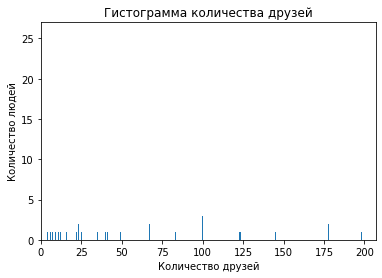

In [135]:
xs = range(207)
ys = [friends_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,207,0,27])
plt.title('Гистограмма количества друзей')
plt.xlabel('Количество друзей')
plt.ylabel('Количество людей')
plt.show()

Число точек данных

In [136]:
num_points = len(num_friends)
print(num_points)

27


Максимальное значение

In [137]:
largest_value = max(num_friends)
print(largest_value)

207


Минимальное значение

In [138]:
smallest_value = min(num_friends)
print(smallest_value)

4


Значения в определённых позициях

In [139]:
sorted_values = sorted(num_friends)
print('sorted_values: ',sorted_values)
smallest_value =sorted_values[0]
print('smallest_value: ',smallest_value)
second_smallest_value = sorted_values[1]
print('second_smallest_value: ',second_smallest_value)
second_largest_value = sorted_values[-2]
print('second_largest_value: ',second_largest_value)

sorted_values:  [4, 6, 7, 9, 11, 12, 16, 22, 23, 23, 25, 35, 40, 41, 49, 67, 67, 83, 100, 100, 100, 123, 145, 178, 178, 198, 207]
smallest_value:  4
second_smallest_value:  6
second_largest_value:  198


## Показатели центра распределения

Среднее значение

In [140]:
def mean(x):
    return sum(x)/len(x)

In [141]:
mean(num_friends)

69.22222222222223

Медиана

In [142]:
def median(v):
    """возвращает ближайшее к середине значение для v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n//2
    if n % 2 == 1:
        # если нечётное, вернуть срединное значение
        return sorted_v[midpoint]
    else:
        # если чётное, вернуть среднее двух срединных значений
        lo = midpoint - 1
        hi = midpoint
        return(sorted_v[lo]+sorted_v[hi])/2

In [143]:
median(num_friends)

41

Квантиль - значение, меньше которого расположен определённый процент данных

In [144]:
def quantile(x,p):
    """возвращает значение в x, соответствующее p-му проценту данных """
    p_index=int(p*len(x)) # преобразует значение % в индекс списка
    return sorted(x)[p_index]

In [145]:
quantile(num_friends,0.10)

7

In [146]:
quantile(num_friends,0.25) # нижний квантиль

16

In [147]:
quantile(num_friends,0.75) # верхний квантиль

100

In [148]:
quantile(num_friends,0.90)

178

In [149]:
quantile(num_friends,0.99)

207

Мода - значение или значения, которые встречаются наиболее часто 

In [160]:
from collections import Counter
def mode(x):
    """возвращает список, т.к мод можед быть более одной"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]

In [161]:
mode(num_friends)

[100]

## Показатели вариации

Размах


In [162]:
def data_range(x):
    return max(x)-min(x)

In [163]:
data_range(num_friends)

203

Дисперсия

In [166]:
# вектор отклонений от среднего (центрировать вектор)
def de_mean(x):
    """ пересчитать x, вычтя его среднее (среднее результата = 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]
# дисперсия - это сумма квадратов отклонений от среднего
# в зарубежной литературе этот показатель носит название variance
def variance(x):
    """предполагается что вектор x состоит из как минимум двух элементов"""
    n = len(x)
    deviation = de_mean(x)
    return sum_of_squares(deviation)/(n-1)

In [167]:
variance(num_friends)

4147.794871794872

Стандартное отклонение

In [169]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [171]:
standard_deviation(num_friends)

64.40337624530932

Интерквантильный размах

In [172]:
def interquantile_range(x):
    return quantile(x,0.75) - quantile(x,0.25)

In [173]:
interquantile_range(num_friends)

84

## Корреляция

In [174]:
daily_minutes = [123,59,71,30,55,63,10,10,30,120,40,60,210,234,63,168,297,61,12,80,30,30,35,127,128,69,278]

Ковариация - парный аналог дисперсии

In [175]:
def covariance(x,y):
    n =len(x)
    return dot(de_mean(x),de_mean(y))/(n-1)

In [176]:
covariance(num_friends,daily_minutes)

3497.1923076923076

* covariance > 0 - x стремится принимать большие значения при больших значениях y
* covariance < 0 - x стремится принимать малые значения при больших значениях y
* covariance = 0 - связи нет

Корреляция 

In [177]:
def correlation(x, y):
    stdev_x = standart_deviation(x)
    stdev_y = standart_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y)/stdev_x/stdev_y
    else:
        return 0

In [178]:
correlation(num_friends,daily_minutes)

0.6731991832296426

Корреляция
* -1 - идеальная антикорреляция
* 1 - идеальная корреляция

### Ловушки корреляции

In [179]:
x=[-2,-1,0,1,2]
y=[2,1,0,1,2]
correlation(x,y)

0.0

Корреляция равна нуль, однако связь есть

к тому же корреляция ничего не говорит о величине связи

In [183]:
x=[-2,1,0,1,2]
y=[99.98,99.99,100,100.01,100.02]
correlation(x,y)

0.8340576562281805

Далее смотри библиотеку статистики SciPy

# Теория вероятностей

## Зависимость и независимость случайных событий

Два события E и F являются независимыми, если вероятность их совместного появления равна произведению вероятностей их наступления по отдельности:

                                               P(E,F)=P(E)P(F)

Два события E и F являются зависимыми, если  какое-то знание о наступлении события E даёт нам знания о наступлении события F, и наоборот.

## Условная вероятность

Если E и F зависимы(!и при этом вероятность наступления события F не равна нулю!),то условная вероятность события E при условии события F: 

                                              P(E|F)=P(E,F)/P(F)

часто эту формулу приводят к виду:

                                               P(E,F)=P(E|F)P(F)

Если E и F независимы, то формула приобретает следующий вид:

                                                P(E|F)=P(E)

То есть знание о наступлении события F не даёт информации о наступлении события  E если E и F независимы

### Пародокс мальчика и девочки

Есть семья. В семье двое детей, чей пол нам не известен. При этом предполагаем что:
* каждый ребёнок равновероятно является либо мальчиком, либо девочкой
* пол второго ребёнка не зависит от пола первого

Вероятности:
- оба не девочки: 1/4
- 1 мальчик и 1 девочка: 1/2
- обе девочки: 1/4

Вероятность что оба девочки(B) при условии что первая девочка(G)

                                     P(B|G)=P(B,G)/P(G)=P(B)/P(G)= 1/2

B и G (оба ребёнка девочки и старший ребёнок - девочка) представлено одним событием B.(Если извесно что обаребёнка - девочки, то верно что старший ребёнок - девочка)

Вероятность что оба девочки(B) при условии что хотя бы один из детей девочка(L)


                                    P(B|L)=P(B,L)/P(L)=P(B)/P(L)=1/3 !!!!

Проверка парадокса

In [12]:
# Произвольно выберем мальчика или девочку
import random

def random_kid()->str:
    return random.choice(["boy","girl"])

# проверка парадокса мальчика и девочки
both_girl = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(1000000):# провести эксперимент на совокупности из 1 000 000 семей
    younger = random_kid()
    older = random_kid()
    if older == "girl": # старшая?
        older_girl+=1
    if older == "girl" and younger == "girl": # обе?
        both_girl+=1
    if older == "girl" or younger == "girl": # любая из двух?
        either_girl+=1
        
print("P(обе|старшая):",both_girl/older_girl)
print("P(обе|любая):",both_girl/either_girl)

P(обе|старшая): 0.49821423931791337
P(обе|любая): 0.3324149960128336


## Теорема Бейса